In [1]:
from sklearn.cluster import KMeans
from semi_supervised_clustering_self_training import *

In [2]:
x_train, y_train, x_test, y_test = mnist_data(categorical=True)
# Method = LabelPropagation
Method = SVC
rounds = 5


In [3]:
accs = []
percentages = [0.02, 0.05, 0.1, 0.2, 0.5]
for percentage in tqdm(percentages, desc=">> percentages"):
    accs_round = []
    for _ in range(rounds):
        labeled_data, labeled_labels, unlabeled_data, unlabeled_labels = prepare_labeled_data(x_train, y_train,
                                                                                              percentage=percentage)
        X = np.concatenate((labeled_data, unlabeled_data), axis=0)
        label_assignments = list(labeled_labels) + list(unlabeled_labels)

        # Preparing labels for semi-supervised learning
        labels = np.concatenate((labeled_labels, [-1] * len(unlabeled_labels)))  # -1 denotes unlabeled points

        # Label Propagation
        svm_model = Method()
        svm_model.fit(labeled_data, labeled_labels)
        cluster_assignments = svm_model.predict(X)

        # Method.scatter_cluster_points_with_labeled(X, label_assignments, cluster_assignments, n_labeled=len(labeled_labels))
        accs_round.append(clustering_accuracy(label_assignments, cluster_assignments))
    accs.append(accs_round)


>> percentages: 100%|██████████| 5/5 [00:56<00:00, 11.22s/it]


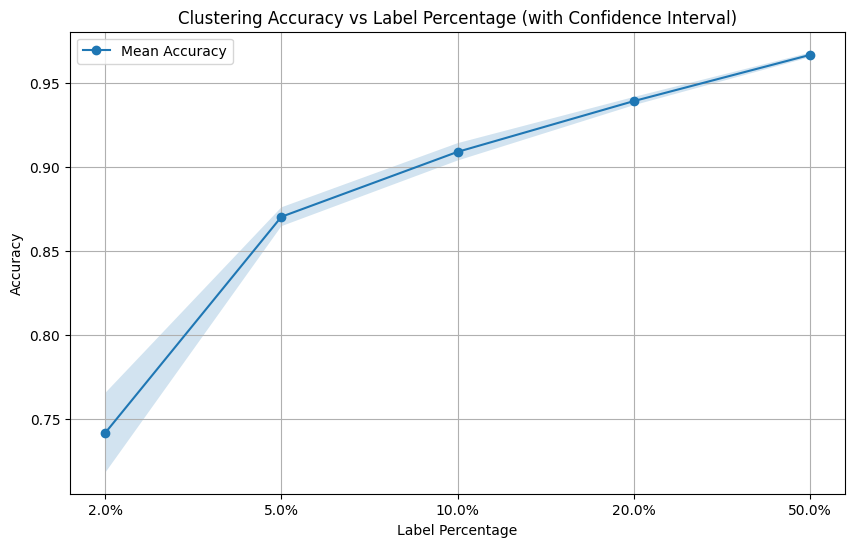

In [4]:
plot_clustering_accs(accs, percentages)